<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 5

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: Stochastic Risk Minimization and The Bayes Classifier

### Problem 1.2 (Exam Style Except for the Code)

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
import sklearn

In [4]:
def p_xy(x, y):
    assert np.isscalar(y), 'y must be a scalar'
    q = (3 - 2 * x) / 8 * np.sin(3 * np.pi * x / 2)
    if y == 1:
        z = 1/2 - x / 3 + q
    else:
        z = 1 - 2 * x / 3 - q
    return np.squeeze(z)

def p_x(x):
    return p_xy(x, 1) + p_xy(x, 2)

def p_y_given_x(x,y):
    return p_xy(x,y) / p_x(x)

def h_star(x):
    return 1 if p_y_given_x(x,1) > p_y_given_x(x,2) else 2

In [5]:
def plot_functions(x, functions, labels, font_size, title=None, margin=0.1):
    plt.figure(figsize=(8, 4), tight_layout=True)
    y_max = -np.inf
    for f, label in zip(functions, labels):
        y = f(x)
        plt.plot(x, y, label=label)
        y_max = np.maximum(y_max, np.max(y))
    plt.xlabel(r'$x$', fontsize=font_size)
    if len(labels) == 1 and title is None:
        plt.title(labels[0], fontsize=font_size)
    else:
        plt.legend(fontsize=font_size)
    if title is not None:
        plt.title(title, fontsize=font_size)
    plt.xlim(0, 1)
    plt.ylim(0, y_max + margin)
    plt.yticks(np.arange(0, y_max + 1), fontsize=font_size)
    plt.gca().tick_params(axis='both', labelsize=font_size)

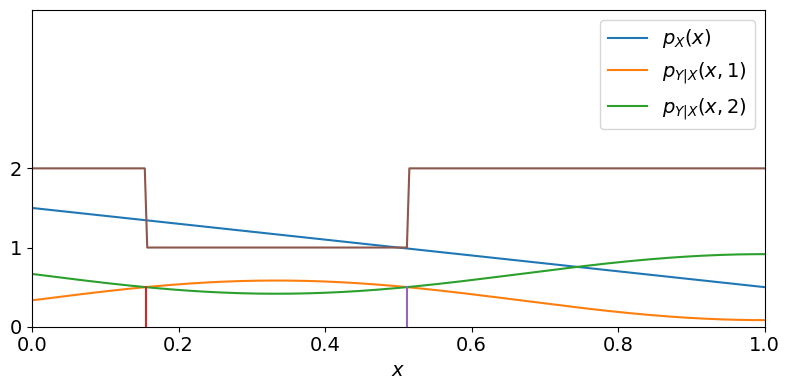

In [6]:
# CUSTOM: grouped into 1 figure

xx = np.linspace(0, 1, 300)
plot_font_size = 14
plot_functions(
    xx, [
        # lambda x: p_xy(xx, 1), 
        # lambda x: p_xy(xx, 2),
        lambda x: p_x(xx),
        lambda x: p_y_given_x(xx, 1),
        lambda x: p_y_given_x(xx, 2),
    ],
    [
        # r'$p_{XY}(x, 1)$', 
        # r'$p_{XY}(x, 2)$',  
        r'$p_{X}(x)$',  
        r'$p_{Y|X}(x, 1)$',  
        r'$p_{Y|X}(x, 2)$'
    ], plot_font_size
)

x1,x2 = 0.154832, 0.511814
plt.plot((x1,x1), (0,p_y_given_x(x1,1)))
plt.plot((x2,x2), (0,p_y_given_x(x2,1)))

plt.plot(xx, list(map(h_star, xx)))

plt.ylim(0,4)
plt.show()

### Problem 1.3

In [7]:
def bayes_risk(boundaries):
    x1, x2 = boundaries
    part1 = scipy.integrate.quad(lambda x: p_xy(x,1), 0, x1)
    part2 = scipy.integrate.quad(lambda x: p_xy(x,2), x1,x2)
    part3 = scipy.integrate.quad(lambda x: p_xy(x,1), x2,1)
    return np.sum(np.array([part1,part2,part3])[:,0])

print(np.round(bayes_risk([x1,x2]),3))

0.378


### Problem 1.4 (Exam Style)

Risk is not zero because Bayesian classifier returns most probable value of y at each x.

However, at most x, there are two possible values of y, with nonzero probability.

Therefore, there must be some loss due to the less likely y values occuring.

### Problem 1.5

In [8]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [9]:
def retrieve(file_name, semester='fall25', homework=5):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [10]:
file_name = 'samples.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    samples = pickle.load(file)

Using previously downloaded file samples.pkl


KNN accuracy:  0.611
Logistic Regression accuracy:  0.545
Bayes Classifier accuracy:  0.62


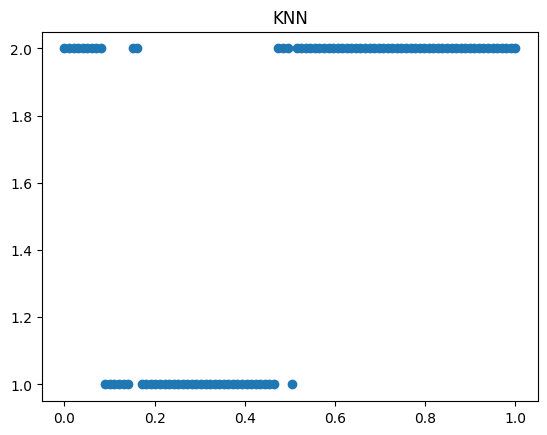

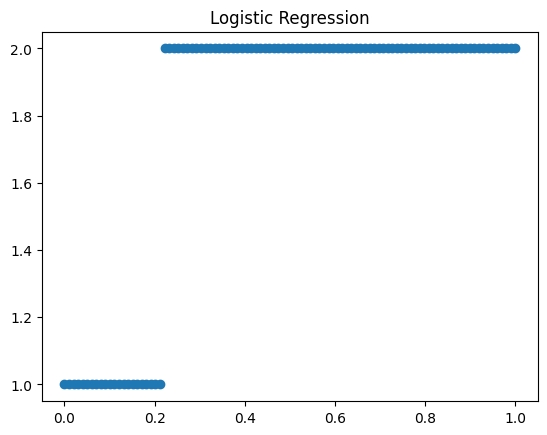

In [11]:
def train_model(model, train_x, train_y, test_x, test_y, title):
    model.fit(train_x, train_y)
    xx = np.linspace(0,1,100)
    yy = model.predict(xx[..., np.newaxis])
    
    _, ax = plt.subplots()
    ax.scatter(xx,yy)
    ax.set_title(title)

    return model, model.score(test_x, test_y)

train_x,train_y = samples['train']['x'],samples['train']['y']
test_x,test_y = samples['test']['x'],samples['test']['y']
train_x.shape

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=100)
knn, knn_acc = train_model(knn, train_x, train_y, test_x, test_y, "KNN")
print("KNN accuracy: ", round(knn_acc,3))

logreg = sklearn.linear_model.LogisticRegression()
logreg, logreg_acc = train_model(logreg, train_x, train_y, test_x, test_y, "Logistic Regression")
print("Logistic Regression accuracy: ", round(logreg_acc,3))

def bayes_accuracy(test_x, test_y):
    return sum([h_star(x) == y for (x,y) in zip(test_x,test_y)]) / len(test_x)

bayes_acc = bayes_accuracy(test_x,test_y)
print("Bayes Classifier accuracy: ", round(bayes_acc,3))

### Problem 1.6 (Exam Style)

1. 100-NN achieves 0.611, almost as good as Bayes' 0.62; achieved 0.98 of its accuracy.

2. Softmax achieves 0.545, worse than Bayes' 0.62; achieved 0.88 of its accuracy.

3. Softmax does poorly because data is not near linearly separable. 

4. ?

5. p_y_given_x is hard to determine and estimate. curse of dimensionality, sparse data. T can be fluke of p.

## Part 2: Validation 

### Problem 2.1 (Exam Style)

$k=1$

$$
\begin{array}{c|c|c|c|c}
m & x_m & y_m & h(x_m) & l \\\hline
1 & 0 & 6 & 6 & 0 \\
2 & 5 & 6 & 18 & 144 \\
3 & 12 & 12 & 6 & 36
\end{array}
$$

$$
\text{Validation Risk: } L_V(1) = 60
$$

$k=2$

$$
\begin{array}{c|c|c|c|c}
m & x_m & y_m & h(x_m) & l \\\hline
1 & 0 & 6 & 12 & 36 \\
2 & 5 & 6 & 12 & 36 \\
3 & 12 & 12 & 9 & 9
\end{array}
$$

$$
\text{Validation Risk: } L_V(2) = 27
$$

$k=3$

$$
\begin{array}{c|c|c|c|c}
m & x_m & y_m & h(x_m) & l \\\hline
1 & 0 & 6 & 10 & 16 \\
2 & 5 & 6 & 10 & 16 \\
3 & 12 & 12 & 12 & 0
\end{array}
$$

$$
\text{Validation Risk: } L_V(3) = 10.667
$$

$\hat{k}=3$ because $L_V(3) = 10.667$ has lowest risk.

### Problem 2.2 (Exam Style)

1. $$n*1*K=4*1*3=12$$

$4$ validation sets of $1$ point for each value of $k={1,2,3}$

2. $$F*n/F*K=2*4/2*3=12$$

$2$ validations sets of $2$ points for each value of $k={1,2,3}$

### Problem 2.3 (Exam Style)

| n   | $x_n$ | $y_n$ | $h_{-n}(x_n)$ | $l$ |
| --- | ----- | ----- | ------------- | --- |
| 1   | 1     | 6     | 18            | 144 |
| 2   | 5     | 18    | 6             | 144 |
| 3   | 13    | 6     | 12            | 36  |
| 4   | 15    | 12    | 6             | 36  |

\begin{align*}
\hat{L} &= \frac{144 + 144 + 36 + 36}{4} = 90 \\
\hat{\sigma}^2 
&= \frac{1}{N-1}\sum_{n=1}^N (L_{-n}-\hat{L})^2 \\
&= \frac{1}{3}\big[(144-90)^2 + (144-90)^2 + (36-90)^2 + (36-90)^2\big] \\
&= \frac{1}{3}(54^2 + 54^2 + 54^2 + 54^2) \\
&= 3888
\end{align*}

## Part 3: Interpret Cross-Validation with Care

In [12]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [13]:
def retrieve(file_name, semester='fall25', homework=5):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [14]:
file_name = 'mnist.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    mnist = pickle.load(file)
tx, ty = mnist['train']['x'],mnist['train']['y']
sx, sy = mnist['test']['x'],mnist['test']['y']

Using previously downloaded file mnist.pkl


### Problem 3.1

In [15]:
ks = [1,3,5,7,9]
knn = sklearn.neighbors.KNeighborsClassifier()
gridsearch = sklearn.model_selection.GridSearchCV(knn, {"n_neighbors": ks}, cv=30)
gridsearch.fit(tx,ty)

k_hat_cv = gridsearch.best_params_['n_neighbors']
best_score_cv = gridsearch.best_score_
print("k_hat_cv=", k_hat_cv)
print("best_score_cv=", best_score_cv)

k_hat_cv= 1
best_score_cv= 0.9132971294647941


In [16]:
train_scores = []
test_scores = []
for k in ks:
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(tx,ty)
    test_score = knn.score(sx,sy)
    train_score = knn.score(tx,ty)
    test_scores.append(test_score)
    train_scores.append(train_score)

best_score_test = max(test_scores)
k_hat_test = ks[test_scores.index(best_score_test)]

print(test_scores)
print(train_scores)

[0.9098, 0.9141, 0.9148, 0.912, 0.9093]
[1.0, 0.9528, 0.9412, 0.9337, 0.9269]


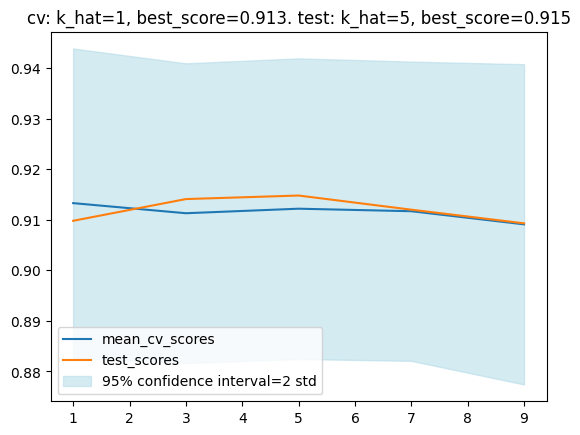

In [17]:
### 95% confidence is 2 standard deviations
### see https://en.wikipedia.org/wiki/Standard_deviation

mean_cv_scores = gridsearch.cv_results_['mean_test_score']
std_cv_scores = gridsearch.cv_results_['std_test_score']

plt.plot(ks, mean_cv_scores, label="mean_cv_scores")
plt.plot(ks, test_scores, label="test_scores")
plt.fill_between(
    ks, 
    mean_cv_scores-2*std_cv_scores, 
    mean_cv_scores+2*std_cv_scores, 
    label='95% confidence interval=2 std', 
    color='lightblue', alpha=0.5)
plt.legend()
plt.title(f"cv: k_hat={k_hat_cv}, best_score={round(best_score_cv,3)}. test: k_hat={k_hat_test}, best_score={round(best_score_test,3)}")
plt.show()

### Problem 3.2 (Exam Style)

1. no, CV gives k hat = 1, test gives k hat = 5.
2. yes, test scores is usu > cv scores, due to more training data
3. prefer test k hat = 5. given std, CV and test scores are consistent. so take test scores, more training data, and separate test set.
4. strong clustering of handwritten digits. very likely many same digits nearer a given digit than a different one. y_hat only changes when majority changes, so classifier is resilient to occasional wrong different digits as neighbors. so k doesnt have major effect because accuracy is already high.

## Part 4: Regularization and the Bootstrap

### Problem 4.1

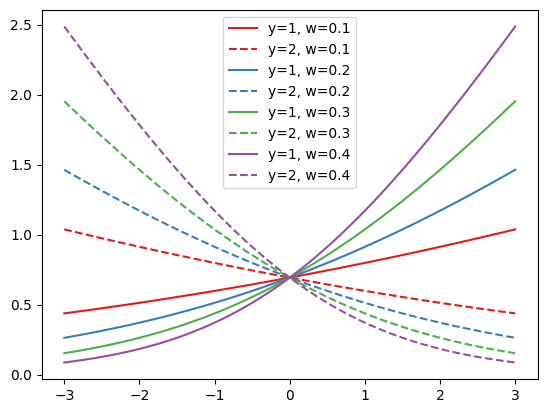

In [18]:
def hinge_loss(y, a):
    return np.log(np.exp(a[0]) + np.exp(a[1])) - a[y]

def act(V, x):
    return V * x

xx = np.linspace(-3,3,100)

Y = [0,1]
W = [0.1,0.2,0.3,0.4]
cmap = plt.get_cmap('Set1')
for w in W:
    V = [[-w],[w]]
    plt.plot(xx, hinge_loss(0, act(V,xx)), label=f'y={1}, w={w}', color=cmap(w))
    plt.plot(xx, hinge_loss(1, act(V,xx)), label=f'y={2}, w={w}', color=cmap(w), linestyle='--')
plt.legend()
plt.show()

### Problem 4.2 (Exam Style)

### 1. 

$T$ is linearly separable, so a decision boundary can classify all points correctly.

so portion of curves $x\leq 0$ matters for $y=1$, and $x>0$ matters for $y=2$

for these portions, $w_1 > w_2 \implies l(y,a([w_1,-w_1],x)) < l(y,a([w_2,-w_2],x))$

since risk is a monotonic increasing function w.r.t each loss, and loss is monotonic decreasing w.r.t $w$,

$L_T(w)$ is a monotonic decreasing function.

### 2.

$$
\begin{align}
\lim_{w \rightarrow \infty}L_T(w)
&=\frac{1}{N}\sum_{n=1}^N\lim_{w \rightarrow \infty}\log(e^{a_1(x_n)}+e^{a_2(x_n)})-a_{y_n}(x_n) \\

&=\frac{1}{N}\sum_{n=1}^N\lim_{w \rightarrow \infty} \log(e^{-wx_n}+e^{wx_n})+
\begin{cases}
wx_n & y=1,x<0\\
-wx_n & y=2,x>0 \\
\end{cases}\\

&=\frac{1}{N}\sum_{n=1}^N\lim_{w \rightarrow \infty} 
\begin{cases}
\log(e^{-wx_n}+0)+wx_n & y=1,x<0\\
\log(0+e^{wx_n})-wx_n & y=2,x>0 \\
\end{cases}\\

&=\frac{1}{N}\sum_{n=1}^N\lim_{w \rightarrow \infty} 
\begin{cases}
-wx_n+wx_n & y=1,x<0\\
wx_n-wx_n & y=2,x>0 \\
\end{cases}\\

&=0 
\end{align}
$$

want to prove

$$ L_T(\infty) = 0$$

### Problem 4.3

In [19]:
import random as rnd

In [20]:
def softmax_classifier(t, c):
    return sklearn.linear_model. \
        LogisticRegression(C=c, max_iter=1000, random_state=3).fit(t['x'], t['y'])

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

def LV(a,b):
    return np.sum([1 if a[i] != b[i] else 0 for i in range(len(a))])

def bootstrap(c_set, t, k):
    L_hat = np.inf
    N = len(t['x'])
    for c in c_set:
        s, s2 = 0, 0
        for _ in range(k):
            idx_bags = np.random.choice(N, N)
            idx_vali = np.setdiff1d(np.arange(N), idx_bags)
            
            bags = {k:v[idx_bags] for k,v in t.items()}
            vali = {k:v[idx_vali] for k,v in t.items()}
            
            h = softmax_classifier(bags, c)
            L = LV(h.predict(vali['x']),vali['y'])

            s += L
            s2 += L**2
        L = s / k
        if L < L_hat:
            L_hat = L
            c_hat = c
            var_hat = (s2 - s**2 / k) / (k - 1)
    
    h_hat = softmax_classifier(t, c_hat)
    return c_hat, h_hat, L_hat, var_hat

N = 1000
c_set = np.linspace(0.0002,1,10)
t = mnist['train']
k = 5
c_hat, h_hat, L_hat, var_hat = bootstrap(c_set,t,k)

print(c_hat, h_hat, L_hat, var_hat)
print('best C:', np.round(c_hat,3))
print('training accuracy:',np.round(h_hat.score(tx,ty),3))
print('testing accuracy:',np.round(h_hat.score(sx,sy),3))

0.1112888888888889 LogisticRegression(C=np.float64(0.1112888888888889), max_iter=1000,
                   random_state=3) 405.0 620.5
best C: 0.0
training accuracy: 0.975
testing accuracy: 0.905


best C: 0.111

training accuracy: 0.975

testing accuracy: 0.905

1. a bit of overfitting, 0.975 training, 0.905 testing
2. the predictor was trained len(c_set) * k + 1 times
3. yes? lower training acc but higher testing acc

### Problem 4.4 (Exam Style)

1. $(1-p)^K$
2. $1-(1-p)^K$
2. $1-p^K$